# 11 Removing Interface Points within Fault Buffers

This following will present how vertices of LineStrings stored as GeoDataFrames can be removed if they share the same points with the trace of a fault. The LineStrings in questions usually represent layer boundaries on geological maps. If vertices of these boundaries are sharing the same coordinates as the fault vertices, the interpolation in `GemPy`or a subsequent uncertainty analysis may not work properly. 

<img src="../images/tutorial11_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [2]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/11_removing_interfaces_within_fault_buffers/'

## Loading Interface points and fault data

For this tutorial, we are using layer boundaries and fault traces from the Aachen area, Germany. Both data sets are saved as shape files and will be loaded with `GeoPandas`. The interface data is saved as a Polygon but LineStrings can be extracted from that. 

The data used for GemGIS was provided by the Geological Survey NRW (GD NRW). It will be used under Datenlizenz Deutschland – Namensnennung – Version 2.0 (https://www.govdata.de/dl-de/by-2-0) with © Geowissenschaftliche Daten: IS GK 50, Projektgebiet Ballunngsraum Aachen (2020).

### Loading Data

The faults and interfaces are loaded using GeoPandas.

In [3]:
import geopandas as gpd
import gemgis as gg

faults = gpd.read_file(file_path + 'GK50_Tektonik.shp')
faults = faults.to_crs('EPSG:4647')
faults.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,ID,NAME,LEGENDE,TYP,BEDECKUNG,HYDRAULIK,AKTIVITAET,BEDEUTUNG,BEARBEITUN,AENDERUNGS,AKTUALISIE,SHAPE_Leng,geometry
0,90006,-,Abschiebung,Abschiebung (su),keine quartäre Bedeckung,nicht bekannt,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,236.48,"LINESTRING (32322728.046 5638651.481, 32322623..."
1,90185,Aachener Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,überregionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,403.92,"LINESTRING (32297864.303 5632557.868, 32297856..."
2,90196,Breinigerberg Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,184.94,"LINESTRING (32300812.497 5620357.365, 32300932..."
3,90196,Breinigerberg Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,5738.56,"LINESTRING (32301454.461 5620679.837, 32301589..."
4,90196,Breinigerberg Überschiebung,Auf- oder Überschiebung,Aufschiebung (sa),keine quartäre Bedeckung,hydraulisch wirksam - wasserführend,tektonisch nicht aktiv,lokale bis regionale Bedeutung,2010-07-29,2010-07-29,2019-09-26,713.29,"LINESTRING (32306882.447 5625319.830, 32306899..."


In [4]:
interfaces = gpd.read_file(file_path + 'GeologicalMapAachen.shp')
print(interfaces.crs)
interfaces.head()

epsg:4647


,OBJECTID,SYSTEM2,SERIE2,SSERIE2,STUFE2,SSTUFE2,SYSTEM1,SERIE1,SSERIE1,STUFE1,...,SGRUPPE,SSYMBOL,EINHEIT1,EINHEIT2,SSY_GSY,GE_GG,GRUTEXT,SHAPE_Leng,SHAPE_Area,geometry
0,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,-,dfrs+f,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,"POLYGON ((32299083.709 5631034.983, 32299164.0..."
1,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,-,mii7,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,"POLYGON ((32317556.700 5633860.692, 32317497.2..."
2,133,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,-,mii7,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,7644.70,2347096.98,"POLYGON ((32310428.554 5638385.230, 32310400.4..."
3,134,-,-,-,-,-,Cretaceous,Oberkreide,-,Santonium,...,-,krsah,Aachen-Formation,"Aachen-Formation, Hergenrath-Subformation","krsah,ut",17400001115.00,Schluff und Ton; untergeordnet Fein- bis Mitte...,19078.93,2340702.57,"POLYGON ((32291096.918 5622295.519, 32290989.7..."
4,135,Devon,Oberdevon,-,Famennium,-,Devonian,Mitteldevon,-,Givetium,...,-,dgfk,Massenkalk,-,"dgfk,KD",46800002015.00,Kalkstein und Dolomitstein,4615.89,405124.98,"POLYGON ((32307344.796 5625848.944, 32307389.6..."


### Plotting the Input Data

The data can be plotted using the built-in GeoPandas plotting function.

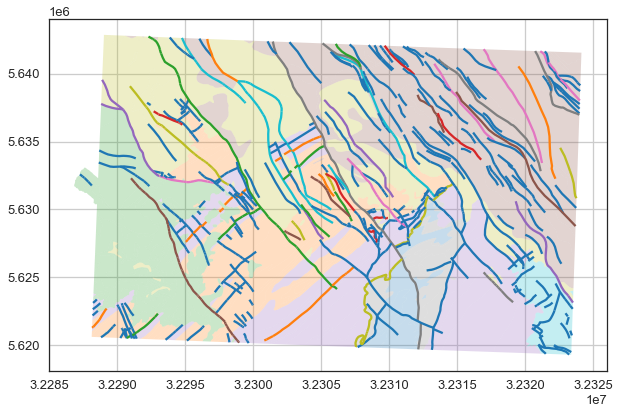

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
faults.plot(ax=ax, aspect='equal', column='NAME')
interfaces.plot(ax=ax, aspect='equal', column = 'SYSTEM1', alpha = 0.25)
plt.grid()

Exploding Polygons to LineStrings to show the different mapped layers.

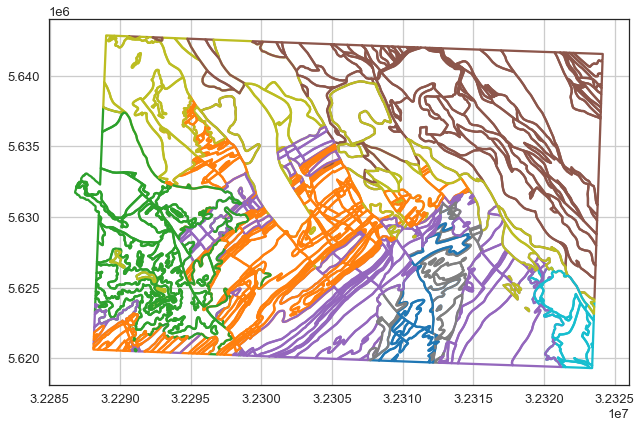

In [10]:
gg.vector.explode_polygons(interfaces).plot(column='SYSTEM1')
plt.grid()

## Removing interfaces within fault buffers

The removal of interfaces from within fault buffers consists of multiple steps:

* Creating a buffer around a fault
* Creating buffers for all faults
* Subtracting Geometry objects from another
* Removing object within buffer
* Removing objects within buffer
* Removing all interfaces from all faults

### Creating a buffer around a fault

A buffer needs to be created around a fault so that all vertices of interfaces can be deleted from this buffer. A section (782) of the Sandgewand Fault will be taken to demonstrate the feature. 

Original fault LineString.

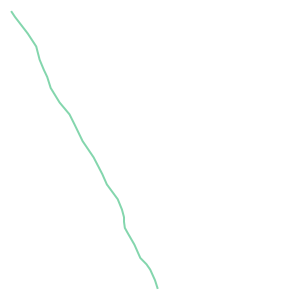

In [5]:
faults.loc[782].geometry

Buffer created around LineString.

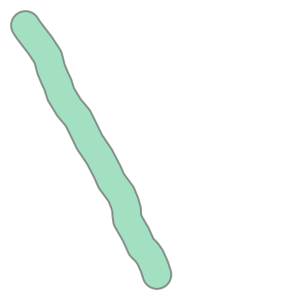

In [6]:
buffered_fault = gg.vector.create_buffer(geom_object=faults.loc[782].geometry, 
                                         distance=500)
buffered_fault

The buffer and the original LineString can also be plotted to illustrate the buffering.

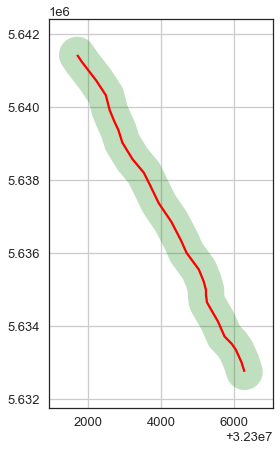

In [7]:
fig, ax = plt.subplots(1,1)

gpd.GeoDataFrame(geometry=[faults.loc[782].geometry]).plot(ax=ax, aspect='equal', color='red')
gpd.GeoDataFrame(geometry=[buffered_fault]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)

plt.grid()

### Creating Buffers around all faults

To avoid creating too many single buffers to check whether an interface is within a buffer or not, one single buffer for all faults can be created. It will be returned as Shapely Multipolygon.

Plotting all faults in the Aachen area.

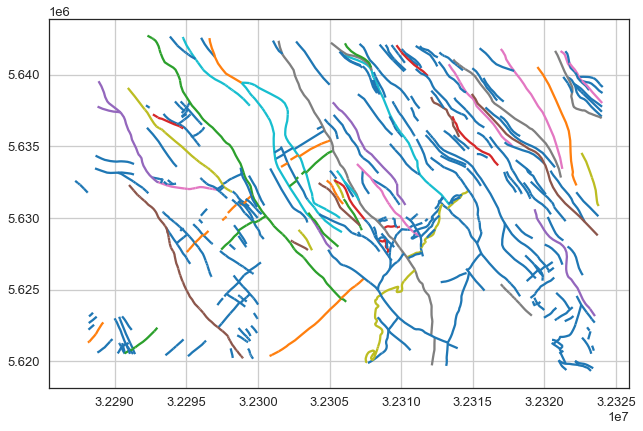

In [8]:
faults.plot(aspect='equal', column='NAME')
plt.grid()

Creating a buffer of 500 m around all faults.

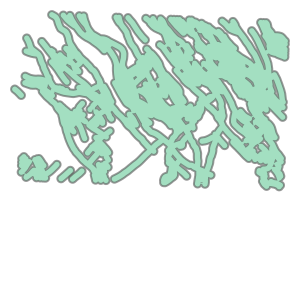

In [9]:
polygon = gg.vector.create_unified_buffer(geom_object=faults, 
                                          distance=500)

polygon

In [10]:
type(polygon)

shapely.geometry.multipolygon.MultiPolygon

### Subtracting Geometry Objects from another

The next step is to subtract the vertices of an interface polygon, linestring or points from the fault bufffer. A layer boundary sharing vertices with the Sandgewand fault will be used for that (198). The polygons will be exploded to LineStrings and MultiLineStrings first so that no artifacts will remain. 

In [11]:
interfaces_ls = gg.vector.explode_polygons(gdf=interfaces)
interfaces_ls.head()

,OBJECTID,SYSTEM2,SERIE2,SSERIE2,STUFE2,SSTUFE2,SYSTEM1,SERIE1,SSERIE1,STUFE1,...,SGRUPPE,SSYMBOL,EINHEIT1,EINHEIT2,SSY_GSY,GE_GG,GRUTEXT,SHAPE_Leng,SHAPE_Area,geometry
0,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,-,dfrs+f,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,"LINESTRING (32299083.709 5631034.983, 32299164..."
1,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,-,mii7,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,"LINESTRING (32317556.700 5633860.692, 32317497..."
2,133,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,-,mii7,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,7644.70,2347096.98,"LINESTRING (32310428.554 5638385.230, 32310400..."
3,134,-,-,-,-,-,Cretaceous,Oberkreide,-,Santonium,...,-,krsah,Aachen-Formation,"Aachen-Formation, Hergenrath-Subformation","krsah,ut",17400001115.00,Schluff und Ton; untergeordnet Fein- bis Mitte...,19078.93,2340702.57,"MULTILINESTRING ((32291096.918 5622295.519, 32..."
4,135,Devon,Oberdevon,-,Famennium,-,Devonian,Mitteldevon,-,Givetium,...,-,dgfk,Massenkalk,-,"dgfk,KD",46800002015.00,Kalkstein und Dolomitstein,4615.89,405124.98,"LINESTRING (32307344.796 5625848.944, 32307389..."


Original Polygon Data.

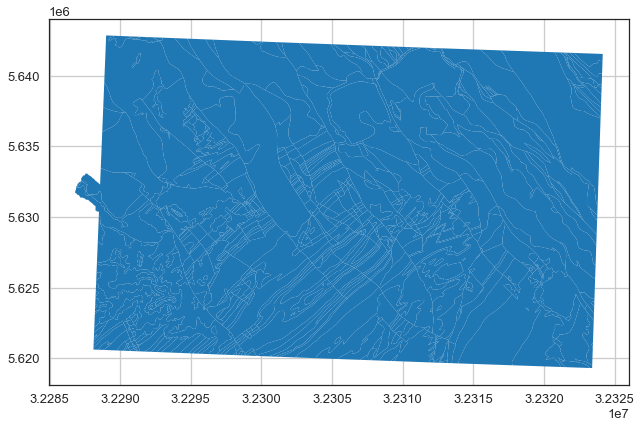

In [12]:
interfaces.plot()
plt.grid()

LineStrings and MultiLineStrings after exploding the polygons.

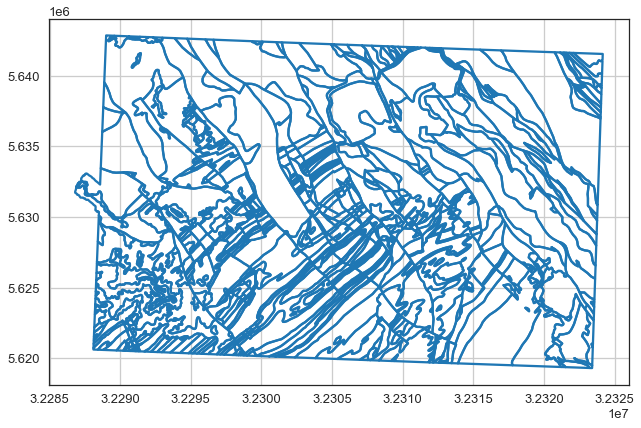

In [13]:
interfaces_ls.plot()
plt.grid()

LineString that will be buffered.

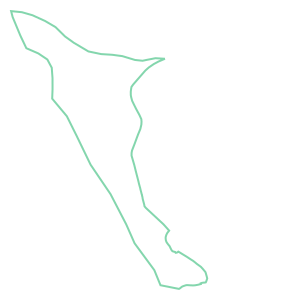

In [14]:
interfaces_ls.loc[198].geometry

Buffer for the LineString.

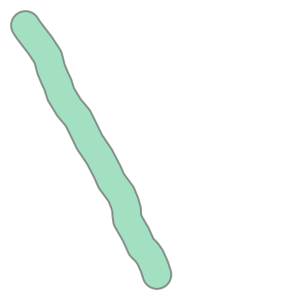

In [15]:
buffered_fault

Subtracting the geometry type from each other.

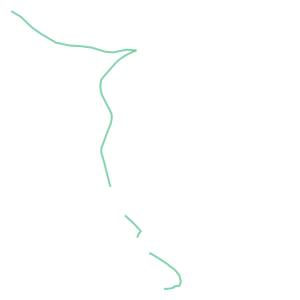

In [16]:
result_geom_object = gg.vector.subtract_geom_objects(geom_object1=interfaces_ls.loc[198].geometry,
                                                     geom_object2=buffered_fault)

result_geom_object

Plotting the removed interfaces (red) and the kept interfaces (green).

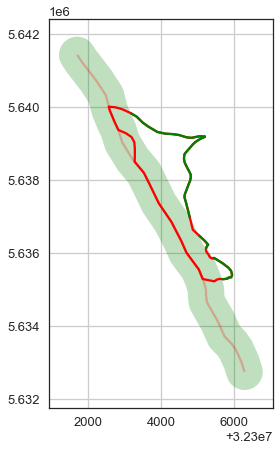

In [17]:
fig, ax = plt.subplots(1,1)
gpd.GeoDataFrame(geometry=[interfaces_ls.loc[198].geometry]).plot(ax=ax, aspect='equal', color='red')

gpd.GeoDataFrame(geometry=[result_geom_object]).plot(ax=ax, aspect='equal', color='green')

gpd.GeoDataFrame(geometry=[buffered_fault]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)
gpd.GeoDataFrame(geometry=[faults.loc[782].geometry]).plot(ax=ax, aspect='equal', color='red', alpha=0.25)

plt.grid()

Performing the subtraction for the entire fault polygon.

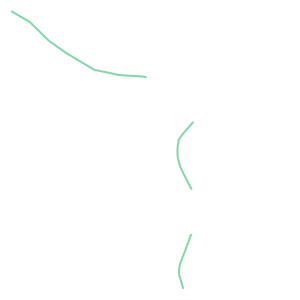

In [18]:
result_geom_object = gg.vector.subtract_geom_objects(geom_object1=interfaces_ls.loc[198].geometry,
                                                     geom_object2=polygon)

result_geom_object

Plotting the removed interfaces (red) and the kept interfaces (green) when substracting it from the entire fault buffer polygon.

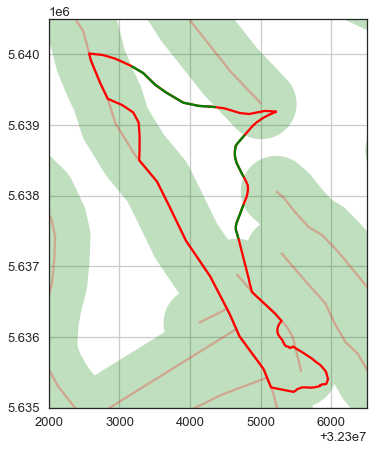

In [19]:
fig, ax = plt.subplots(1,1)
gpd.GeoDataFrame(geometry=[interfaces_ls.loc[198].geometry]).plot(ax=ax, aspect='equal', color='red')

gpd.GeoDataFrame(geometry=[result_geom_object]).plot(ax=ax, aspect='equal', color='green')

gpd.GeoDataFrame(geometry=[polygon]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)
faults.plot(ax=ax, aspect='equal', color='red', alpha=0.25)
plt.xlim(32302000, 32306500)
plt.ylim(5.635e6, 5.6405e6)
plt.grid()

### Removing object within buffer

The two previous steps of creating a buffer and removing the objects within the buffer can be combined in the function ``remove_object_within_buffer(..)``. 

Displaying a second layer around the same fault.

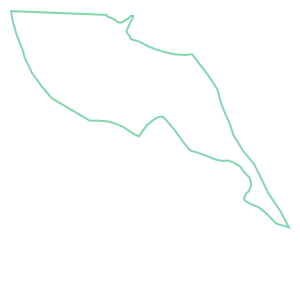

In [20]:
interfaces_ls.loc[374].geometry

Buffer for the same fault as before.

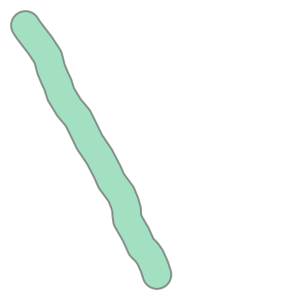

In [21]:
buffered_fault

Removing the object from within the buffer.

In [22]:
outside, inside = gg.vector.remove_object_within_buffer(buffer_object=faults.loc[782].geometry,
                                                           buffered_object=interfaces_ls.loc[374].geometry,
                                                           distance=500)


Interfaces that were not removed from the layer.

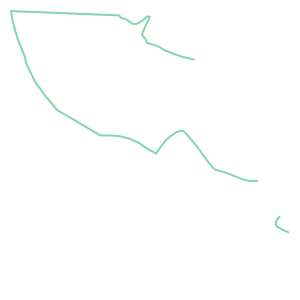

In [23]:
outside

Interfaces that were removed from the layer.

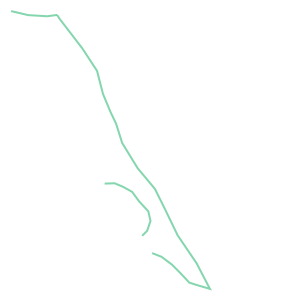

In [24]:
inside

Plotting the interfaces that were removed (red) and the interfaces that were kept (green).

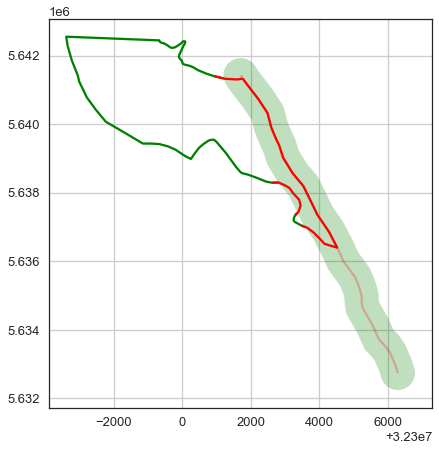

In [25]:
fig, ax = plt.subplots(1,1)
gpd.GeoDataFrame(geometry=[outside]).plot(ax=ax, aspect='equal', color='green')

gpd.GeoDataFrame(geometry=[inside]).plot(ax=ax, aspect='equal', color='red')

gpd.GeoDataFrame(geometry=[buffered_fault]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)
gpd.GeoDataFrame(geometry=[faults.loc[782].geometry]).plot(ax=ax, aspect='equal', color='red', alpha=0.25)

plt.grid()

Performing the same operation with the entire fault polygon

In [26]:
outside, inside = gg.vector.remove_object_within_buffer(buffer_object=polygon,
                                                        buffered_object=interfaces_ls.loc[374].geometry,
                                                        distance=None,
                                                        buffer=False)


The resulting interfaces that are left are less than before as other faults also contributed to the buffering.

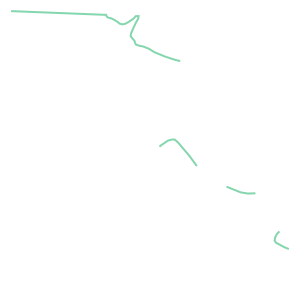

In [27]:
outside

More interfaces were removed as other faults also contributed to the buffering.

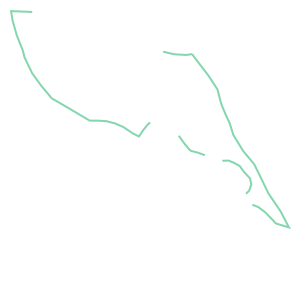

In [28]:
inside

Plotting the interfaces that were removed (red) and the interfaces that were kept (green).

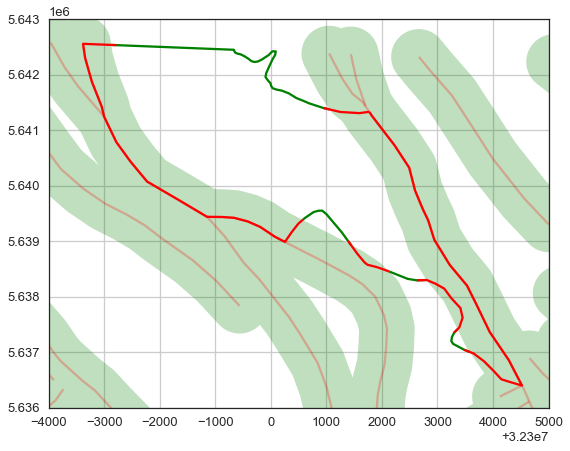

In [29]:
fig, ax = plt.subplots(1,1)
gpd.GeoDataFrame(geometry=[outside]).plot(ax=ax, aspect='equal', color='green')

gpd.GeoDataFrame(geometry=[inside]).plot(ax=ax, aspect='equal', color='red')

gpd.GeoDataFrame(geometry=[polygon]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)
faults.plot(ax=ax, aspect='equal', color='red', alpha=0.25)

plt.xlim(32296000, 32305000)
plt.ylim(5.636e6, 5.643e6)
plt.grid()

### Removing objects within buffer

The next step is to remove multiple objects from the fault buffer polygon at the same time. 

Therefore, we create a GeoDataFrame with interfaces objects and use once only one fault and then all faults. 

In [30]:
interfaces_gdf = gpd.GeoDataFrame(geometry=[interfaces_ls.loc[374].geometry, 
                                            interfaces_ls.loc[198].geometry, 
                                            interfaces_ls.loc[800].geometry])
interfaces_gdf

,geometry
0,"LINESTRING (32301771.153 5641329.303, 32301821..."
1,"LINESTRING (32305222.632 5639189.905, 32305218..."
2,"MULTILINESTRING ((32294465.330 5639887.282, 32..."


Plotting the interfaces and the fault including its buffer. Two layers are touching the fault, the third one does not.

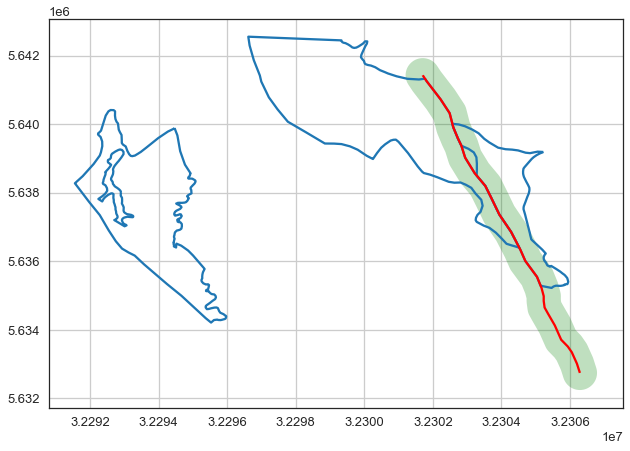

In [31]:
fig, ax = plt.subplots(1,1)

interfaces_gdf.plot(ax=ax, aspect='equal')
gpd.GeoDataFrame(geometry=[gg.vector.create_buffer(faults.loc[782].geometry, 500)]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)
gpd.GeoDataFrame(geometry=[faults.loc[782].geometry]).plot(ax=ax, aspect='equal', color='red')

plt.grid()

Removing the interfaces from the fault buffer.

In [32]:
gdf_out, gdf_in = gg.vector.remove_objects_within_buffer(buffer_object=faults.loc[782].geometry, 
                                                         buffered_objects_gdf=interfaces_gdf,
                                                         distance=500,
                                                         return_gdfs=True)

Resulting GeoDataFrame containing the geometry objects that remained outside the fault buffers.

In [33]:
gdf_out

,geometry
0,"MULTILINESTRING ((32303580.528 5637004.216, 32..."
1,"MULTILINESTRING ((32305222.632 5639189.905, 32..."
2,"MULTILINESTRING ((32294465.330 5639887.282, 32..."


Resulting GeoDataFrame containing the geometry objects that were within the buffer. The last LineString is empty since the third layer did not touch the fault.

In [34]:
gdf_in

,geometry
0,"MULTILINESTRING ((32301771.153 5641329.303, 32..."
1,"MULTILINESTRING ((32304795.577 5636961.054, 32..."
2,LINESTRING EMPTY


Plotting the vertices that were kept (green) and removed (red).

In [35]:
faults_gdf = gpd.GeoDataFrame(geometry=[faults.loc[782].geometry])
faults_gdf

,geometry
0,"LINESTRING (32301705.663 5641428.471, 32301705..."


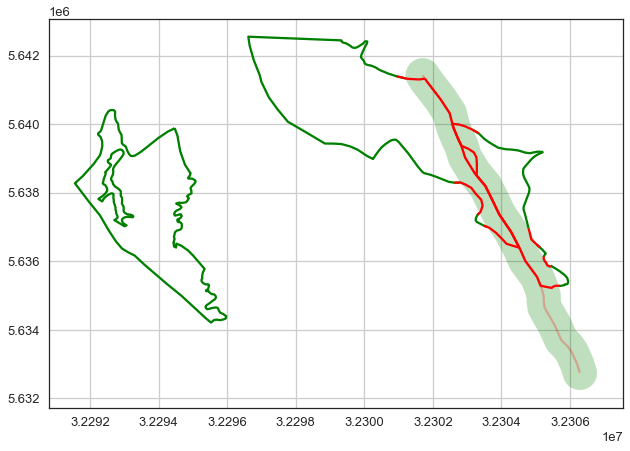

In [36]:
fig, ax = plt.subplots(1,1)

gdf_out.plot(ax=ax, aspect='equal', color='green')
gdf_in[~gdf_in.is_empty].plot(ax=ax, aspect='equal', color='red')
faults_gdf.plot(ax=ax, aspect='equal', color='red', alpha=0.25)
gpd.GeoDataFrame(geometry=[gg.vector.create_buffer(faults.loc[782].geometry, 500)]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)
plt.grid()

Performing the same operation for the entire fault buffer polyon.

In [37]:
gdf_out, gdf_in = gg.vector.remove_objects_within_buffer(buffer_object=polygon, 
                                                         buffered_objects_gdf=interfaces_gdf,
                                                         distance=None,
                                                         return_gdfs=True, 
                                                         buffer=False)

Resulting GeoDataFrame containing the geometry objects that remained outside the fault buffers.

In [38]:
gdf_out

,geometry
0,"MULTILINESTRING ((32303580.528 5637004.216, 32..."
1,"MULTILINESTRING ((32304771.851 5638858.254, 32..."
2,"MULTILINESTRING ((32291916.587 5638630.583, 32..."


Resulting GeoDataFrame containing the geometry objects that were within the buffer.

In [39]:
gdf_in

,geometry
0,"MULTILINESTRING ((32301771.153 5641329.303, 32..."
1,"MULTILINESTRING ((32305222.632 5639189.905, 32..."
2,"MULTILINESTRING ((32294465.330 5639887.282, 32..."


Plotting the vertices that were kept (green) and removed (red).

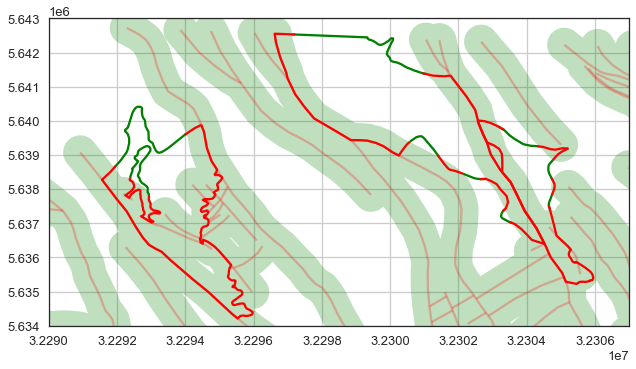

In [40]:
fig, ax = plt.subplots(1,1)

gdf_out.plot(ax=ax, aspect='equal', color='green')
gdf_in[~gdf_in.is_empty].plot(ax=ax, aspect='equal', color='red')
faults.plot(ax=ax, aspect='equal', color='red', alpha=0.25)
gpd.GeoDataFrame(geometry=[polygon]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)

plt.xlim(32290000, 32307000)
plt.ylim(5.634e6, 5.643e6)
plt.grid()

### Removing all Interfaces from all Faults

The functions above can now be generalized to the function ``remove_interfaces_within_fault_buffers(..)`` were the loaded fault GeoDataFrame and the loaded polygon GeoDataFrame are loaded.

In [41]:
gdf_out, gdf_in = gg.vector.remove_interfaces_within_fault_buffers(fault_gdf=faults,
                                                                   interfaces_gdf=interfaces,
                                                                   distance=250)

The GeoDataFrame with all its column and Shapely points that remained outside a fault polygon.

In [42]:
gdf_out.head()

,OBJECTID,SYSTEM2,SERIE2,SSERIE2,STUFE2,SSTUFE2,SYSTEM1,SERIE1,SSERIE1,STUFE1,...,EINHEIT1,EINHEIT2,SSY_GSY,GE_GG,GRUTEXT,SHAPE_Leng,SHAPE_Area,geometry,X,Y
0,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,POINT (32316610.248 5635509.674),32316610.25,5635509.67
1,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,POINT (32316651.533 5635494.023),32316651.53,5635494.02
2,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,POINT (32316651.919 5635493.752),32316651.92,5635493.75
3,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,POINT (32316811.783 5635381.554),32316811.78,5635381.55
4,132,-,-,-,-,-,Neogene,MiozÃ¤n,ObermiozÃ¤n,-,...,Inden-Formation,-,"mii7,s4",7000001110.00,Fein- bis Mittelsand; untergeordnet Schluff un...,4409.72,487296.28,POINT (32317075.334 5635058.862),32317075.33,5635058.86


The GeoDataFrame with all its column and Shapely points that are inside a fault polygon.

In [43]:
gdf_in.head()

,OBJECTID,SYSTEM2,SERIE2,SSERIE2,STUFE2,SSTUFE2,SYSTEM1,SERIE1,SSERIE1,STUFE1,...,EINHEIT1,EINHEIT2,SSY_GSY,GE_GG,GRUTEXT,SHAPE_Leng,SHAPE_Area,geometry,X,Y
0,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,POINT (32299083.709 5631034.983),32299083.71,5631034.98
1,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,POINT (32299164.005 5630970.066),32299164.01,5630970.07
2,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,POINT (32299123.225 5630909.550),32299123.23,5630909.55
3,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,POINT (32299088.346 5630931.022),32299088.35,5630931.02
4,131,Devon,Oberdevon,-,Famennium,-,Devonian,Oberdevon,-,Frasnium,...,Frasnes- und Famenne-Schiefer,-,"dfrs+f,T",45403002130.00,Tonstein; untergeordnet Kalkmergel- bis Mergel...,459.12,12043.31,POINT (32298996.618 5630993.458),32298996.62,5630993.46


Plotting the final result of interfaces that are outside a fault polygon (green) and interfaces inside a fault polygon (red).

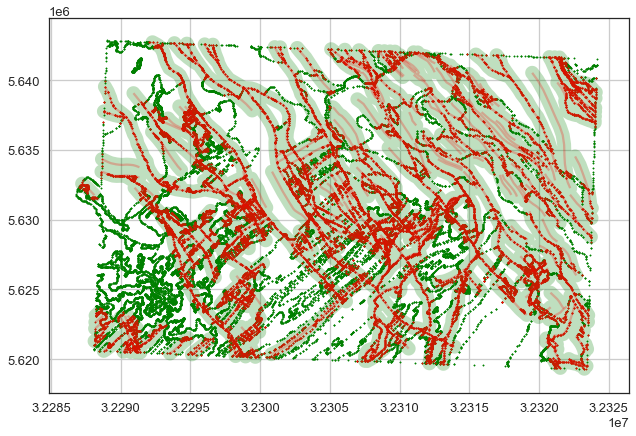

In [44]:
fig, ax = plt.subplots(1,1)

gdf_out.plot(ax=ax, aspect='equal', color='green',markersize=2)
gdf_in[~gdf_in.is_empty].plot(ax=ax, aspect='equal', color='red', markersize=2)
faults.plot(ax=ax, aspect='equal', color='red', alpha=0.25)
gpd.GeoDataFrame(geometry=[polygon]).plot(ax=ax, aspect='equal', color='green', alpha=0.25)

plt.grid()